# Gapped k-mer Support Vector Machine (gkSVM) Classification
Adam Klie 
08/02/2021

Notebook to preprocess the data for, train and evaluate a gkSVM classsifier based on the implmentation in https://github.com/Dongwon-Lee/lsgkm/.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Loading webpages
from IPython.display import IFrame

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

In [2]:
import sys
sys.path.append('/cellar/users/aklie/projects/EUGENE/bin/')
import project_utils

# Load data

In [3]:
X, y = np.loadtxt('../data/2021_OLS_Library/X_seqs_0.18-0.4.txt', dtype=str), np.loadtxt('../data/2021_OLS_Library/y_binary_0.18-0.4.txt', delimiter=' ', dtype=int)

In [4]:
seq_ids = np.loadtxt('../data/2021_OLS_Library/sequence_id_0.18-0.4.txt', dtype=str)

In [5]:
X.shape, y.shape, seq_ids.shape

((302936,), (302936,), (302936,))

# Check gkSVM assumptions

# Train and test gkSVM model with script

## **Train/test split**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
split = 0.9

In [8]:
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, seq_ids, train_size=split, random_state=13, shuffle=True)

### **Split into negative and positive for lsgkm**

#### <u> **Train** </u>

In [9]:
# Mask
train_neg_mask = (y_train == 0)

In [10]:
# Negative seqs
X_train_neg = X_train[train_neg_mask]
y_train_neg = y_train[train_neg_mask]
id_train_neg = id_train[train_neg_mask]

# Positive seqs
X_train_pos = X_train[~train_neg_mask]
y_train_pos = y_train[~train_neg_mask]
id_train_pos = id_train[~train_neg_mask]

In [11]:
# Check
print(X_train_neg.shape, y_train_neg.shape)
print(X_train_pos.shape, y_train_pos.shape)
if (X_train_neg.shape[0] + X_train_pos.shape[0] == X_train.shape[0]):
    print("We good: {}, {}, {}".format(X_train.shape, y_train.shape, id_train.shape))
else:
    print("The game is afoot")

(187791,) (187791,)
(84851,) (84851,)
We good: (272642,), (272642,), (272642,)


*Positive training sequences*

In [12]:
tr_file = open("../data/2021_OLS_Library/OLS.tr.fa", "w")
for i in range(len(X_train_pos)):
    tr_file.write(">" + id_train_pos[i] + "\n" + X_train_pos[i] + "\n")
tr_file.close()

In [13]:
!wc -l ../data/2021_OLS_Library/OLS.tr.fa

169702 ../data/2021_OLS_Library/OLS.tr.fa


In [14]:
len(X_train_pos)*2

169702

*Negative training sequences*

In [15]:
tr_neg_file = open("../data/2021_OLS_Library/OLS.neg.tr.fa", "w")
for i in range(len(X_train_neg)):
    tr_neg_file.write(">" + id_train_neg[i] + "\n" + X_train_neg[i] + "\n")
tr_neg_file.close()

In [16]:
!wc -l ../data/2021_OLS_Library/OLS.neg.tr.fa

375582 ../data/2021_OLS_Library/OLS.neg.tr.fa


In [17]:
len(X_train_neg)*2

375582

#### <u> **Test** </u>

In [18]:
# Mask
test_neg_mask = (y_test == 0)

In [19]:
# Negative seqs
X_test_neg = X_test[test_neg_mask]
y_test_neg = y_test[test_neg_mask]
id_test_neg = id_test[test_neg_mask]

# Positive seqs
X_test_pos = X_test[~test_neg_mask]
y_test_pos = y_test[~test_neg_mask]
id_test_pos = id_test[~test_neg_mask]

In [20]:
# Check
print(X_test_neg.shape, y_test_neg.shape)
print(X_test_pos.shape, y_test_pos.shape)
if (X_test_neg.shape[0] + X_test_pos.shape[0] == X_test.shape[0]):
    print("We good: {}, {}. {}".format(X_test.shape, y_test.shape, id_test.shape))
else:
    print("The game is afoot")

(20938,) (20938,)
(9356,) (9356,)
We good: (30294,), (30294,). (30294,)


*Positive test sequences*

In [21]:
test_file = open("../data/2021_OLS_Library/OLS.test.fa", "w")
for i in range(len(X_test_pos)):
    test_file.write(">" + id_test_pos[i] + "\n" + X_test_pos[i] + "\n")
test_file.close()

In [22]:
!wc -l ../data/2021_OLS_Library/OLS.test.fa

18712 ../data/2021_OLS_Library/OLS.test.fa


In [23]:
len(X_test_pos)*2

18712

*Negative test sequences*

In [24]:
test_neg_file = open("../data/2021_OLS_Library/OLS.neg.test.fa", "w")
for i in range(len(X_test_neg)):
    test_neg_file.write(">" + id_test_neg[i] + "\n" + X_test_neg[i] + "\n")
test_neg_file.close()

In [25]:
!wc -l ../data/2021_OLS_Library/OLS.neg.test.fa

41876 ../data/2021_OLS_Library/OLS.neg.test.fa


In [26]:
len(X_test_neg)*2

41876

## gkSVM Training and testing

In [ ]:
#sbatch gkSVM.sh OLS.tr.fa OLS.neg.tr.fa OLS.test.fa OLS.neg.test.fa OLS

In [ ]:
#!gkmpredict OLS.tr.fa OLS.model.txt OLS.tr.predict.txt
#!gkmpredict OLS.neg.tr.fa OLS.model.txt OLS.neg.tr.predict.txt

## gkSVM evaluation with help from downloaded script 
https://raw.githubusercontent.com/kundajelab/lsgkm/master/scripts/lsgkm_eval.py 

**Provided script**

In [38]:
# Train
project_utils.score('Result_2021-OLS-X-fasta_0.18-0.4_baseline-regularization-strength/2021-OLS-X-fasta_0.18-0.4_baseline-regularization-strength.tr.predict.txt', 
                    'Result_2021-OLS-X-fasta_0.18-0.4_baseline-regularization-strength/2021-OLS-X-fasta_0.18-0.4_baseline-regularization-strength.neg.tr.predict.txt',
                    0)

Metric	Value	Randomised
Accuracy_at_threshold_0	0.7671	0.6243
AUROC	0.7735	0.4984
AUPRC	0.6521	0.3103


In [39]:
# Test
project_utils.score('Result_2021-OLS-X-fasta_0.18-0.4_baseline-regularization-strength/2021-OLS-X-fasta_0.18-0.4_baseline-regularization-strength.predict.txt', 
                    'Result_2021-OLS-X-fasta_0.18-0.4_baseline-regularization-strength/2021-OLS-X-fasta_0.18-0.4_baseline-regularization-strength.neg.predict.txt',
                    0)

Metric	Value	Randomised
Accuracy_at_threshold_0	0.7668	0.6275
AUROC	0.7725	0.5026
AUPRC	0.6480	0.3101


**Training scores**

In [29]:
# Make sure ordering is correct
pos_tr_scores = project_utils.get_scores('Result_0.18-0.4/X_fasta_0.18-0.4.tr.predict.txt')
neg_tr_scores = project_utils.get_scores('Result_0.18-0.4/X_fasta_0.18-0.4.neg.tr.predict.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'Result_0.18-0.4/X_fasta_0.18-0.4.tr.predict.txt'

In [ ]:
y_tr_probs = np.array(pos_tr_scores + neg_tr_scores)

In [ ]:
y_tr_preds = (y_tr_probs >= 0).astype(int)

In [ ]:
y_train = np.array([1]*len(pos_tr_scores) + [0]*len(neg_tr_scores))

In [ ]:
print(y_train.shape, y_tr_probs.shape, y_tr_preds.shape)

**Test scores**

In [ ]:
# Make sure ordering is correct
pos_scores = project_utils.get_scores('Result_0.18-0.4/X_fasta_0.18-0.4.predict.txt')
neg_scores = project_utils.get_scores('Result_0.18-0.4/X_fasta_0.18-0.4.neg.predict.txt')

In [ ]:
y_probs = np.array(pos_scores + neg_scores)

In [ ]:
y_preds = (y_probs >= 0).astype(int)

In [ ]:
y_test = np.array([1]*len(pos_scores) + [0]*len(neg_scores))

In [ ]:
print(y_test.shape, y_probs.shape, y_preds.shape)

### <u>**Confusion matrices** </u>

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
np.unique(y_tr_preds, return_counts=True), np.unique(y_preds, return_counts=True)

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,8))

rc = {"font.size": 20}
with plt.rc_context(rc):
    sns.heatmap(confusion_matrix(y_train, y_tr_preds), annot=True, fmt='d', cmap='viridis', ax=ax[0])
    ax[0].set_xlabel('predicted')
    ax[0].set_ylabel('true label')
    ax[0].set_title('Train Set')

    sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='d', cmap='viridis', ax=ax[1])
    ax[1].set_xlabel('predicted')
    ax[1].set_ylabel('true label')
    ax[1].set_title('Test Set')
    
    plt.tight_layout();

### <u> **Accuracies** </u>

In [33]:
from sklearn.metrics import accuracy_score

In [30]:
train_acc, test_acc = accuracy_score(y_true=y_train, y_pred=y_tr_preds), accuracy_score(y_true=y_test, y_pred=y_preds)

NameError: name 'accuracy_score' is not defined

In [ ]:
print("Train Acc", "Test Acc", sep='\t')
print("{:.4f}\t{:.4f}".format(train_acc, test_acc))

### <u> **F-scores** </u>

In [ ]:
IFrame('https://en.wikipedia.org/wiki/F-score', width=800, height=400)

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
def fbeta_score(pr, rec, beta):
    return (1+(beta**2))*((pr*rec)/(((beta**2)*pr)+rec))

In [36]:
train_prec, test_prec = precision_score(y_true=y_train, y_pred=y_tr_preds), precision_score(y_true=y_test, y_pred=y_preds)

In [37]:
train_recall, test_recall = recall_score(y_true=y_train, y_pred=y_tr_preds), recall_score(y_true=y_test, y_pred=y_preds)

In [38]:
train_f1, test_f1 = f1_score(y_true=y_train, y_pred=y_tr_preds), f1_score(y_true=y_test, y_pred=y_preds)

In [39]:
fbeta_tr_scores = []
fbeta_scores = []
for b in [0.1, 0.5, 1, 2, 10]:
    fbeta_tr_scores.append(fbeta_score(train_prec, train_recall, b))
    fbeta_scores.append(fbeta_score(test_prec, test_recall, b))

In [40]:
print("Metric", "Train", "Test", sep='\t')
print("{:s}\t{:.4f}\t{:.4f}".format("Precision", train_prec, test_prec))
print("{:s}\t{:.4f}\t{:.4f}".format("Recall", train_recall, test_recall))
#print("{:s}\t{:.4f}\t{:.4f}".format("F1-Score", train_f1, test_f1))
for i, b in enumerate([0.1, 0.5, 1, 2, 10]):
    print("F{:s}-Score\t{:.4f}\t{:.4f}".format(str(b), fbeta_tr_scores[i], fbeta_scores[i])) 

Metric	Train	Test
Precision	0.7279	0.7206
Recall	0.4050	0.4021
F0.1-Score	0.7222	0.7149
F0.5-Score	0.6278	0.6220
F1-Score	0.5205	0.5162
F2-Score	0.4444	0.4411
F10-Score	0.4068	0.4039


### <u> **Precision-recall** </u>

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [42]:
precs_tr, recs_tr, threshs_tr = precision_recall_curve(y_true=y_train, probas_pred=y_tr_probs)
avg_prec_tr = average_precision_score(y_true=y_train, y_score=y_tr_probs)

In [43]:
precs, recs, threshs = precision_recall_curve(y_true=y_test, probas_pred=y_probs)
avg_prec = average_precision_score(y_true=y_test, y_score=y_probs)

In [44]:
avg_prec_tr, avg_prec

(0.652847810095438, 0.6485840670468868)

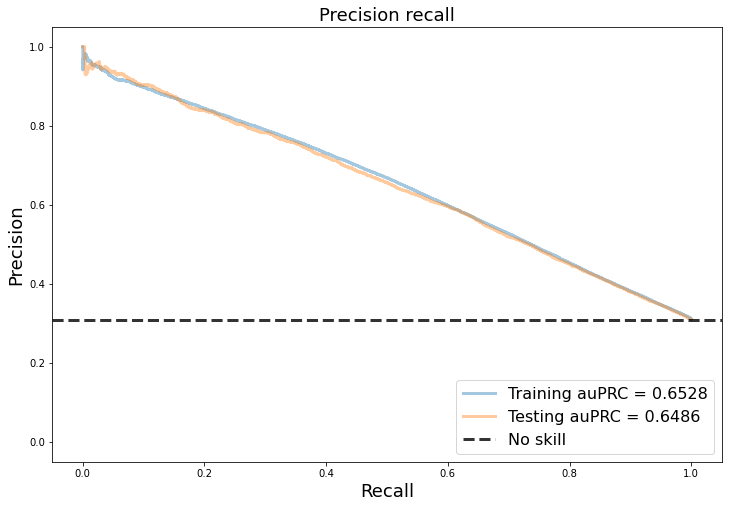

In [47]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.step(recs_tr, precs_tr, where='post', lw=3, alpha=0.4, label='Training auPRC = %0.4f' % (avg_prec_tr))
ax.step(recs, precs, where='post', lw=3, alpha=0.4, label='Testing auPRC = %0.4f' % (avg_prec))
ax.axhline(len(y_test[y_test==1])/len(y_test), linestyle='--', lw=3, color='k', label='No skill', alpha=.8)
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('Recall', fontsize=18)
ax.set_ylabel('Precision', fontsize=18)
ax.set_title('Precision recall', fontsize=18)
ax.legend(loc="lower right", fontsize=16);

### <u> **Reciever operating characteristic** </u>

In [48]:
from sklearn.metrics import roc_curve, auc

In [50]:
fprs_tr, tprs_tr, threshs_tr = roc_curve(y_true=y_train, y_score=y_tr_probs)
roc_auc_tr = auc(fprs_tr, tprs_tr)

In [52]:
fprs, tprs, threshs = roc_curve(y_true=y_test, y_score=y_probs)
roc_auc = auc(fprs, tprs)

In [53]:
roc_auc_tr, roc_auc

(0.774158374803343, 0.7730121577616458)

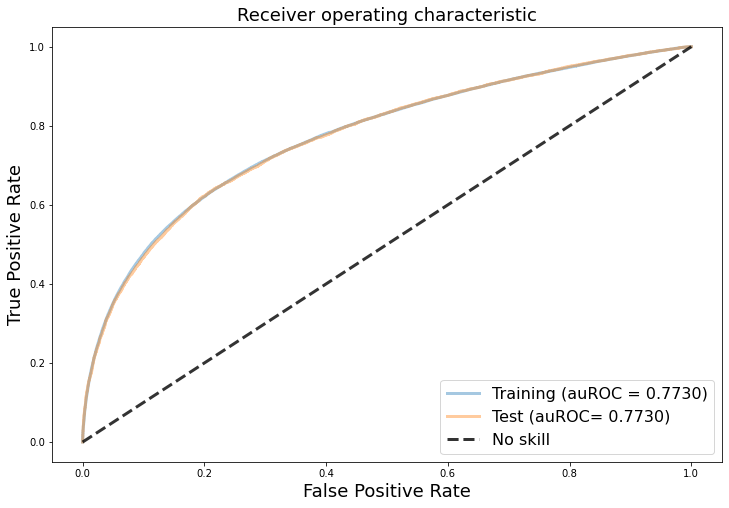

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(fprs_tr, tprs_tr, lw=3, alpha=0.4, label='Training (auROC = %0.4f)' % (roc_auc))
ax.plot(fprs, tprs, lw=3, alpha=0.4, label='Test (auROC= %0.4f)' % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=3, color='k', label='No skill', alpha=.8)
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate', fontsize=18)
ax.set_title('Receiver operating characteristic', fontsize=18)
ax.legend(loc="lower right", fontsize=16);

## Save the classifier
Classifier is already saved by the LS-GKM tool